In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Parametrização

In [8]:
labels = [
    'C1',
    'C2',
    'C3'
]

voips = [3500, 2200, 6000]
beginYear = [2030, 2031, 2032]
stopYear = 2060
maxoil = [150, 120, 60]
t_plateau = [2, 3, 6]
declines = [6, 10, 12]

tma = 0.11
NPVYear = 2022

years = np.arange(np.min(beginYear), stopYear+1, 1)
stopPlateau = np.asarray(beginYear) + np.asarray(t_plateau) - 1

#### Declínio do óleo

In [9]:
qos = []
for l, label in enumerate(labels):
    qo = []
    for y,year in enumerate(years):
        if year < beginYear[l]:
            qo.append(0)
        elif year <= stopPlateau[l]:
            qo.append(maxoil[l])
        else:
            qo.append(qo[y-1] * np.exp(-declines[l]/100))
    qos.append(qo)
qos = np.asarray(qos)

### Np, FR

In [10]:
Nps = []
FRS = []
for i,qo in enumerate(qos):
    Np = np.cumsum(365*qo)/1000
    Nps.append(Np)
    FR = Np/voips[i]*100
    FRS.append(FR)

#### Np*

In [11]:
discounts = [pow(1+tma,d) for d in (years-NPVYear)]
NpAts = []
for i,qo in enumerate(qos):
    NpAt = np.cumsum(365*qo/discounts)/1000
    NpAts.append(NpAt)


#### Plots

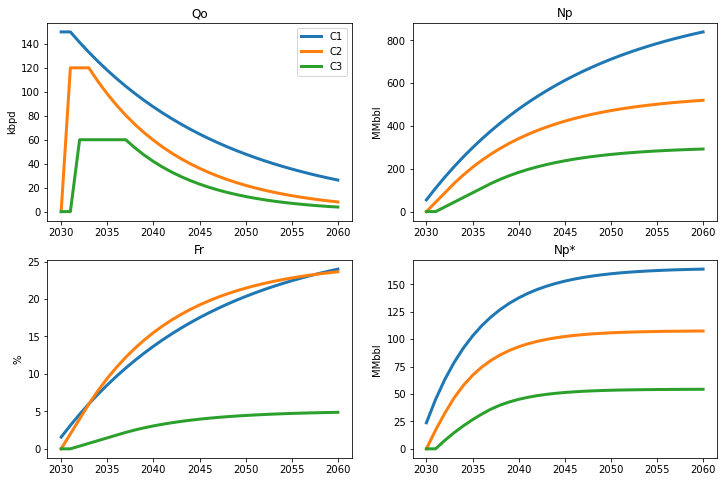

In [12]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

titles = ['Qo','Np','Fr','Np*']
units = ['kbpd','MMbbl','%','MMbbl']
lw=3

for c, qo in enumerate(qos):
    sns.lineplot(years, qo, label=labels[c], ax=ax[0,0], linewidth=lw)
for c, Np in enumerate(Nps):
    sns.lineplot(years, Np, ax=ax[0,1], linewidth=lw)
for c, FR in enumerate(FRS):
    sns.lineplot(years, FR, ax=ax[1,0], linewidth=lw)
for c, NpAt in enumerate(NpAts):
    sns.lineplot(years, NpAt, ax=ax[1,1], linewidth=lw)

for i, ax in enumerate(ax.flat):
    ax.set_title(f'{titles[i]}')
    ax.set_ylabel(f'{units[i]}')

pass;